# 1. Install Dependencies and Setup

In [ ]:
# Install TensorFlow for machine learning, TensorFlow-GPU for GPU support, OpenCV for image processing, and Matplotlib for plotting
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

# Import TensorFlow for building and training ML models
import tensorflow as tf

# Import os module for interacting with the operating system (useful for file paths and environment management)
import os

2. Setting Up GPU and limiting memory consumption

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus: 
    #tf.config.experimental.set_memory_growth(gpu, True)
#tf.config.list_physical_devices('GPU')

In [8]:
# Import OpenCV (cv2) for image processing and computer vision tasks
import cv2

# Import imghdr to determine the type of image files (useful for image validation)
import imghdr

In [10]:
# Define the directory containing image data
data_dir = 'data'

# List of valid image file extensions
image_exts = ['jpeg','jpg', 'bmp', 'png']

# Iterate over each class folder in the data directory
for image_class in os.listdir(data_dir): 
    # Iterate over each image file in the class folder
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Construct the full image path
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            # Read the image using OpenCV
            img = cv2.imread(image_path)
            
            # Check the image extension using imghdr
            tip = imghdr.what(image_path)
            
            # If the image extension is not in the valid list, remove the file
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            # Catch and report any issues with the image
            print('Issue with image {}'.format(image_path))
            # Optionally remove problematic image files
            # os.remove(image_path)

# 3. Load Data

In [47]:
# Import NumPy for numerical operations and handling arrays
import numpy as np

# Import Matplotlib for plotting data and visualizations
from matplotlib import pyplot as plt

Found 305 files belonging to 2 classes.


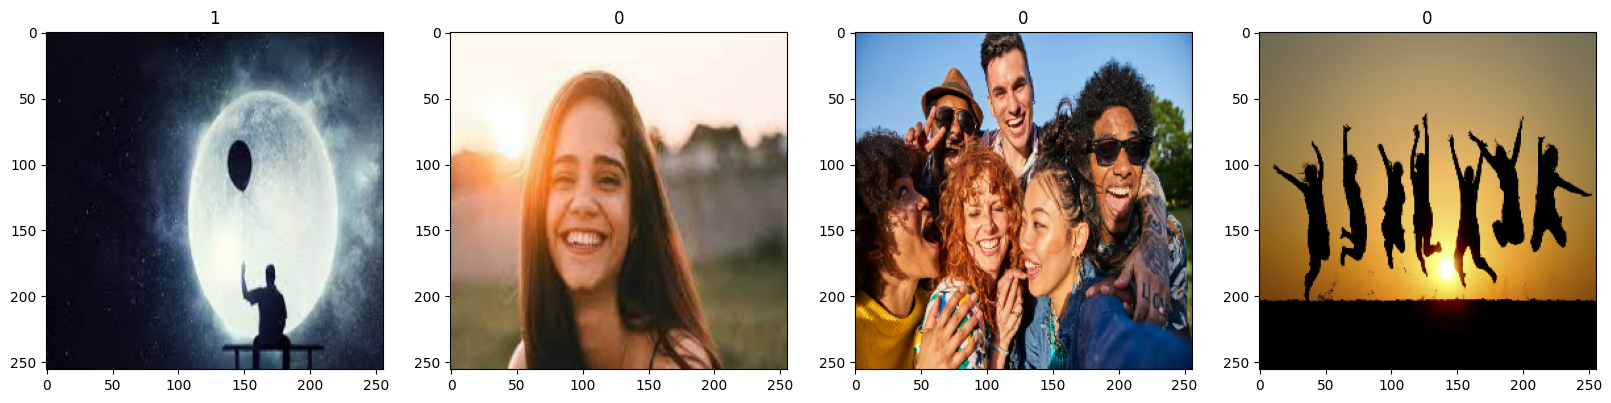

In [48]:
# Load image dataset from the 'data' directory using TensorFlow, automatically labeling subdirectories as classes
data = tf.keras.utils.image_dataset_from_directory('data')

# Create an iterator to loop through the dataset in batches
data_iterator = data.as_numpy_iterator()

# Retrieve the next batch of images and labels from the iterator
batch = data_iterator.next()

# Create a figure with 4 subplots to display images, setting figure size to 20x20
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Loop through the first 4 images in the batch and display them with their corresponding labels as titles
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))  # Display the image
    ax[idx].title.set_text(batch[1][idx])  # Set the image label as the title

# 4. Scale Data

In [18]:
# Normalize the image pixel values to be between 0 and 1 by dividing by 255
# Apply this transformation to the dataset using the map function, keeping the labels unchanged
data = data.map(lambda x, y: (x / 255, y))

# Convert the dataset to a NumPy iterator and retrieve the next batch of normalized images and labels
data.as_numpy_iterator().next()

# 5. Split Data

In [20]:
# Calculate the size for training, validation, and test sets based on the data length
train_size = int(len(data) * 0.7)  # 70% of the data for training
val_size = int(len(data) * 0.2)    # 20% of the data for validation
test_size = int(len(data) * 0.1)   # 10% of the data for testing

# Split the dataset into training, validation, and test sets
train = data.take(train_size)  # Take the first 70% of the data for training
val = data.skip(train_size).take(val_size)  # Skip the training data and take the next 20% for validation
test = data.skip(train_size + val_size).take(test_size)  # Skip the training and validation data, then take 10% for testing

# Return the training set
train

# 6. Build Deep Learning Model

In [24]:
# Import Sequential to build a linear stack of layers for the neural network
from tensorflow.keras.models import Sequential

# Import core layers for building a Convolutional Neural Network (CNN)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
# Initialize a Sequential model to build a linear stack of layers for the neural network
model = Sequential()

In [ ]:
# Add a 2D convolutional layer with 16 filters, a 3x3 kernel, stride of 1, and ReLU activation function
# Input shape is 256x256 with 3 channels (RGB)
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))

# Add a MaxPooling layer to reduce the spatial dimensions (downsampling)
model.add(MaxPooling2D())

# Add a second Conv2D layer with 32 filters and ReLU activation
model.add(Conv2D(32, (3,3), 1, activation='relu'))

# Add another MaxPooling layer to further downsample the input
model.add(MaxPooling2D())

# Add a third Conv2D layer with 16 filters and ReLU activation
model.add(Conv2D(16, (3,3), 1, activation='relu'))

# Add another MaxPooling layer to downsample after the third convolution
model.add(MaxPooling2D())

# Flatten the output from previous layers into a 1D vector for input to the dense layers
model.add(Flatten())

# Add a Dense (fully connected) layer with 256 units and ReLU activation for feature learning
model.add(Dense(256, activation='relu'))

# Add a final Dense layer with 1 unit and sigmoid activation for binary classification output
model.add(Dense(1, activation='sigmoid'))

In [49]:
# Compile the model using the Adam optimizer, binary cross-entropy loss function (for binary classification),
# and track the accuracy as a performance metric
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Print the model architecture summary to show the layers, output shapes, and the number of parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [29]:
# Define a directory to store logs for TensorBoard visualization
logdir = 'logs'

# Create a TensorBoard callback to log training metrics, enabling real-time tracking in TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model on the training data for 20 epochs, with validation using the validation set
# TensorBoard callback is passed to log metrics like loss and accuracy during training
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

# 8. Plot Performance

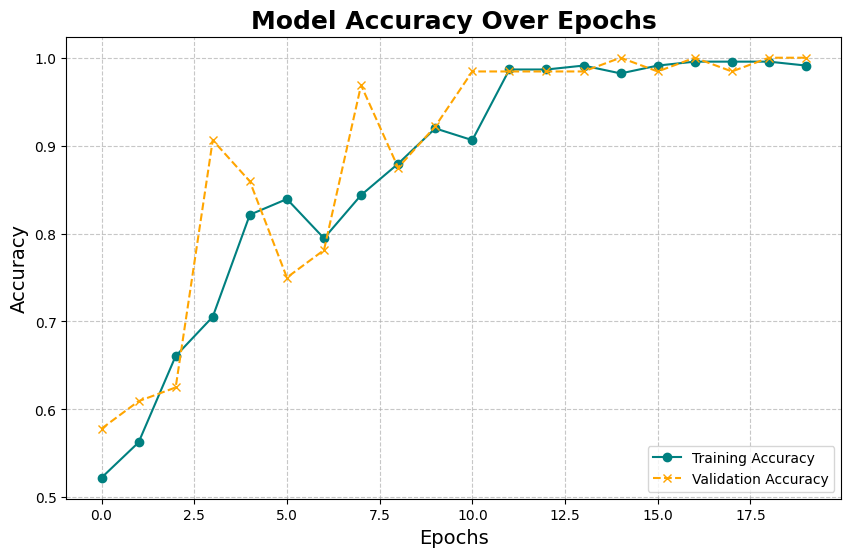

In [53]:
# Create a figure with larger dimensions for better readability
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training accuracy with teal color, solid line, and circle markers
ax.plot(hist.history['accuracy'], color='teal', linestyle='-', marker='o', label='Training Accuracy')

# Plot validation accuracy with orange color, dashed line, and 'x' markers
ax.plot(hist.history['val_accuracy'], color='orange', linestyle='--', marker='x', label='Validation Accuracy')

# Set the title, x-axis label, and y-axis label with appropriate font sizes
ax.set_title('Model Accuracy Over Epochs', fontsize=18, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

# Add a legend at the lower right to distinguish between training and validation accuracy
ax.legend(loc='lower right')

# Enable gridlines for clarity, with dashed lines and slight transparency
ax.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


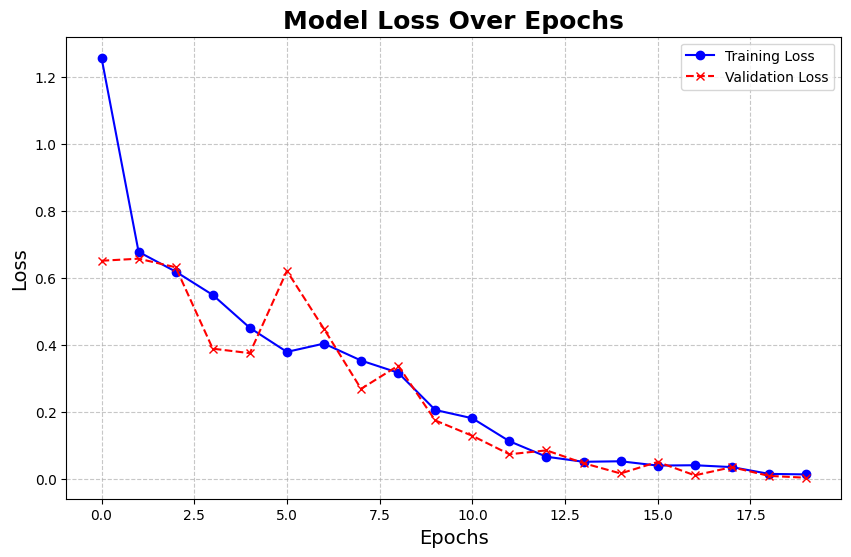

In [55]:
# Create a figure with larger dimensions for better readability
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training loss with blue color, solid line, and circle markers
ax.plot(hist.history['loss'], color='blue', linestyle='-', marker='o', label='Training Loss')

# Plot validation loss with red color, dashed line, and 'x' markers
ax.plot(hist.history['val_loss'], color='red', linestyle='--', marker='x', label='Validation Loss')

# Set the title, x-axis label, and y-axis label with appropriate font sizes
ax.set_title('Model Loss Over Epochs', fontsize=18, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)

# Add a legend at the upper right to distinguish between training and validation loss
ax.legend(loc='upper right')

# Enable gridlines for clarity, with dashed lines and slight transparency
ax.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# 9. Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
# Initialize metrics for Precision, Recall, and Binary Accuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

# Iterate over the batches in the test dataset
for batch in test.as_numpy_iterator(): 
    X, y = batch  # Extract input features (X) and labels (y)
    yhat = model.predict(X)  # Predict the output using the trained model
    
    # Update Precision, Recall, and Accuracy metrics based on the true labels (y) and predicted values (yhat)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [37]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [38]:
import cv2

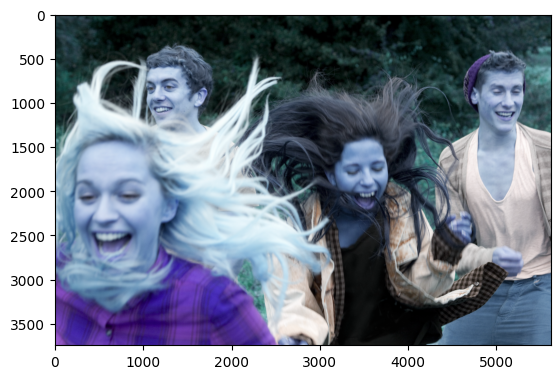

In [39]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

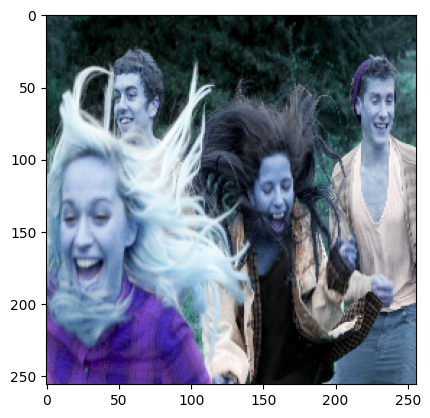

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [42]:
yhat

array([[0.00048986]], dtype=float32)

In [43]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)